In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from LinearMPC_deliverable_4_1.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis
from src.vel_rocket_vis import plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 20
H = 10
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="nonlinear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

delta2_s (trim) = 0.0
du bounds = -0.2617993877991494 0.2617993877991494
=> abs bounds = -0.2617993877991494 0.2617993877991494
['A', 'H', 'b']
['A', 'H', 'b']
Simulating time 0.00: 

c:\Users\SammD\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


u_x: [0.]
u_y: [-0.26179343]
u_z: [39.99999986]
u_roll: [0.]

Simulating time 0.05: u_x: [0.]
u_y: [0.12961724]
u_z: [40.00002054]
u_roll: [0.]

Simulating time 0.10: u_x: [0.]
u_y: [0.10111666]
u_z: [40.00002436]
u_roll: [0.]

Simulating time 0.15: u_x: [0.]
u_y: [-0.26179558]
u_z: [40.00003027]
u_roll: [0.]

Simulating time 0.20: u_x: [0.26179939]
u_y: [0.20740063]
u_z: [40.00002344]
u_roll: [0.]

Simulating time 0.25: u_x: [-0.15834721]
u_y: [-0.26179414]
u_z: [40.00001863]
u_roll: [-2.50758929e-05]

Simulating time 0.30: u_x: [0.26179798]
u_y: [0.26179939]
u_z: [40.00001993]
u_roll: [-0.00981785]

Simulating time 0.35: u_x: [-0.25182198]
u_y: [-0.25012769]
u_z: [40.00002618]
u_roll: [-0.02241094]

Simulating time 0.40: u_x: [0.26179709]
u_y: [0.26179939]
u_z: [40.0000179]
u_roll: [-0.0443442]

Simulating time 0.45: u_x: [0.0961215]
u_y: [0.26179939]
u_z: [40.00002563]
u_roll: [-0.06814381]

Simulating time 0.50: u_x: [-0.26179939]
u_y: [-0.26179939]
u_z: [40.00001799]
u_roll: [-0.0

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

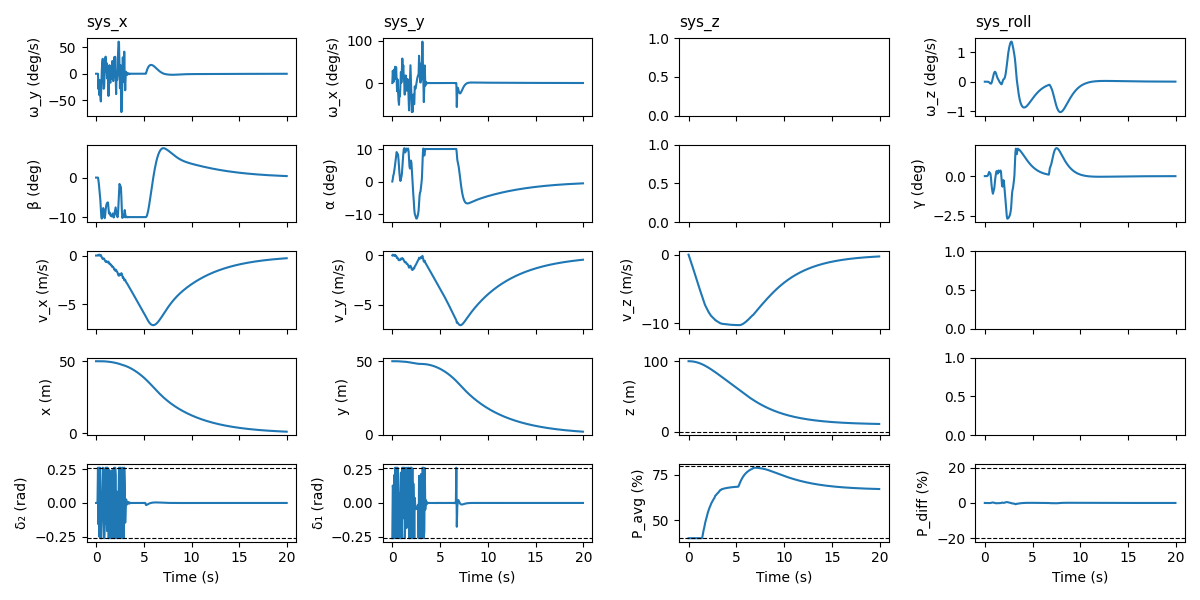

In [4]:
plot_static_states_inputs(
    T=t_cl[:-1],      # time for inputs
    X=x_cl[:, :-1],   # match the same length
    U=u_cl,           # DON'T slice
    Ref=None,
    type="vel"
)

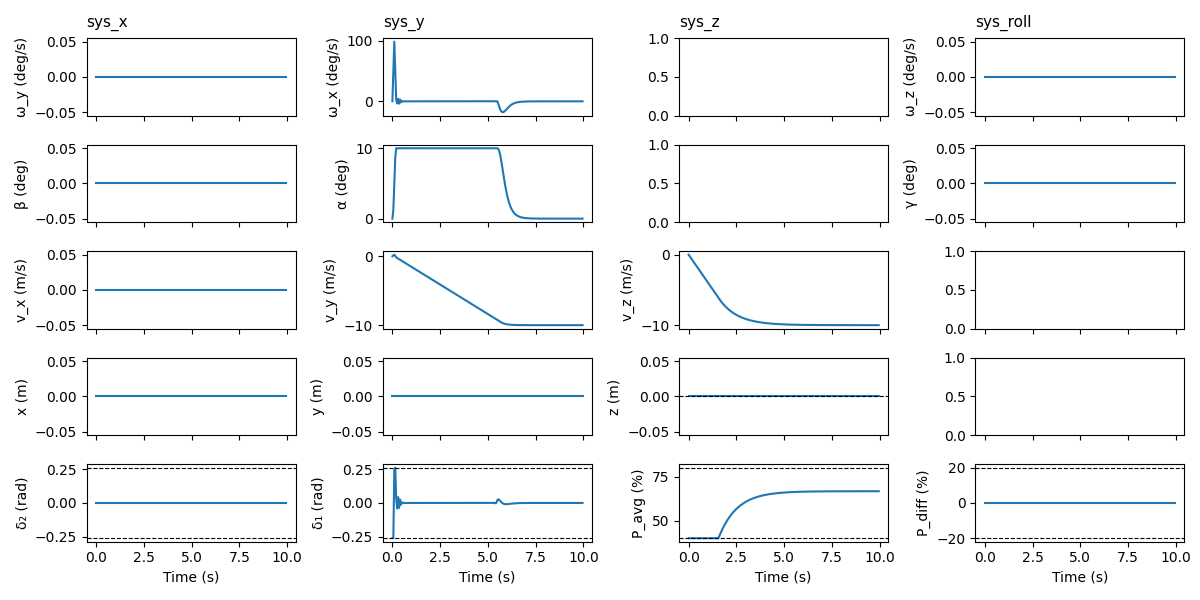

In [5]:
k = 0
T_ol = t_ol[:, k]      # shape (H+1,)
X_ol = x_ol[:, :, k]   # shape (12, H+1)
U_ol = u_ol[:, :, k]   # shape (4, H)

plot_static_states_inputs(
    T=T_ol[:-1],
    X=X_ol[:, :-1],
    U=U_ol,
    Ref=None,
    type="vel"
)